In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Sequential, Model
from keras.layers import (Conv2D, MaxPooling2D, Dense, Flatten, \
                          Dropout, Input,GlobalAveragePooling2D,BatchNormalization)
from tensorflow.keras.activations import softmax
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix, \
                             accuracy_score)
import cv2

In [2]:
our_folders = ['Atopic Dermatitis', \
              'Eczema', \
              'Psoriasis pictures Lichen Planus and related diseases',\
              'Tinea Ringworm Candidiasis and other Fungal Infections']


In [3]:
root_dir = 'D:\\dermotology_research\\dataset\\train'

In [4]:
test_dir = 'D:\\dermotology_research\\dataset\\test'

In [5]:
Atopic_train_path = os.path.join(root_dir,'Atopic Dermatitis')
Eczema_train_path = os.path.join(root_dir, 'Eczema')
Psoriasis_train_path = os.path.join(root_dir, 'Psoriasis pictures Lichen Planus and related diseases')
Tinea_train_path = os.path.join(root_dir, 'Tinea Ringworm Candidiasis and other Fungal Infections')

In [6]:
Atopic_test_path = os.path.join(test_dir,'Atopic Dermatitis')
Eczema_test_path = os.path.join(test_dir, 'Eczema')
Psoriasis_test_path = os.path.join(test_dir, 'Psoriasis pictures Lichen Planus and related diseases')
Tinea_test_path = os.path.join(test_dir, 'Tinea Ringworm Candidiasis and other Fungal Infections')


In [7]:
Atopic_test_files = [file for root, _, files in os.walk(Atopic_test_path, topdown=True) for file in files]
Eczema_test_files = [file for root, _, files in os.walk(Eczema_test_path, topdown=True) for file in files]
Psoriasis_test_files = [file for root, _, files in os.walk(Psoriasis_test_path, topdown=True) for file in files]
Tinea_test_files = [file for root, _, files in os.walk(Tinea_test_path, topdown=True) for file in files]

In [8]:
train_dirs = []
for i in our_folders:
    for folder_,_, files_ in os.walk(f'D:\\dermotology_research\\dataset\\train\\{i}'):
        print(folder_)
        train_dirs.append(folder_)

D:\dermotology_research\dataset\train\Atopic Dermatitis
D:\dermotology_research\dataset\train\Eczema
D:\dermotology_research\dataset\train\Psoriasis pictures Lichen Planus and related diseases
D:\dermotology_research\dataset\train\Tinea Ringworm Candidiasis and other Fungal Infections


In [9]:
Atopic_train_files = []
for root, _, files in os.walk(Atopic_train_path):
    Atopic_train_files += files
    
Eczema_train_files = []
for root, _, files in os.walk(Eczema_train_path):
    Eczema_train_files += files
    
Psoriasis_train_files = []
for root, _, files in os.walk(Psoriasis_train_path):
    Psoriasis_train_files += files
    
Tinea_train_files = []
for root, _, files in os.walk(Tinea_train_path):
    Tinea_train_files += files

In [10]:
def plotGridImages(d_name, list_files, train_path,nrows= 1, ncols=5):
    # for folder_name in our_folders:
    fig = plt.figure(1, figsize=(30, 30))
    grid = ImageGrid(fig, 111, nrows_ncols=(nrows, ncols), axes_pad=0.05)
    print(f"{d_name}")
    for i, img_id in enumerate(random.sample(list_files,ncols)):
        ax = grid[i]
        image_dir_path = os.path.join(train_path, img_id)
        img = image.load_img(image_dir_path, (224, 224))
        img = image.img_to_array(img)
        ax.imshow(img / 255.)
        ax.text(10, 200, 'LABEL: %s' % d_name, color='k', backgroundcolor='w',\
        alpha=0.8)
        ax.axis('off')
    # plt.tight_layout()
    plt.show()

Tinea


C:\Users\10224023\Anaconda3\lib\site-packages\keras\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


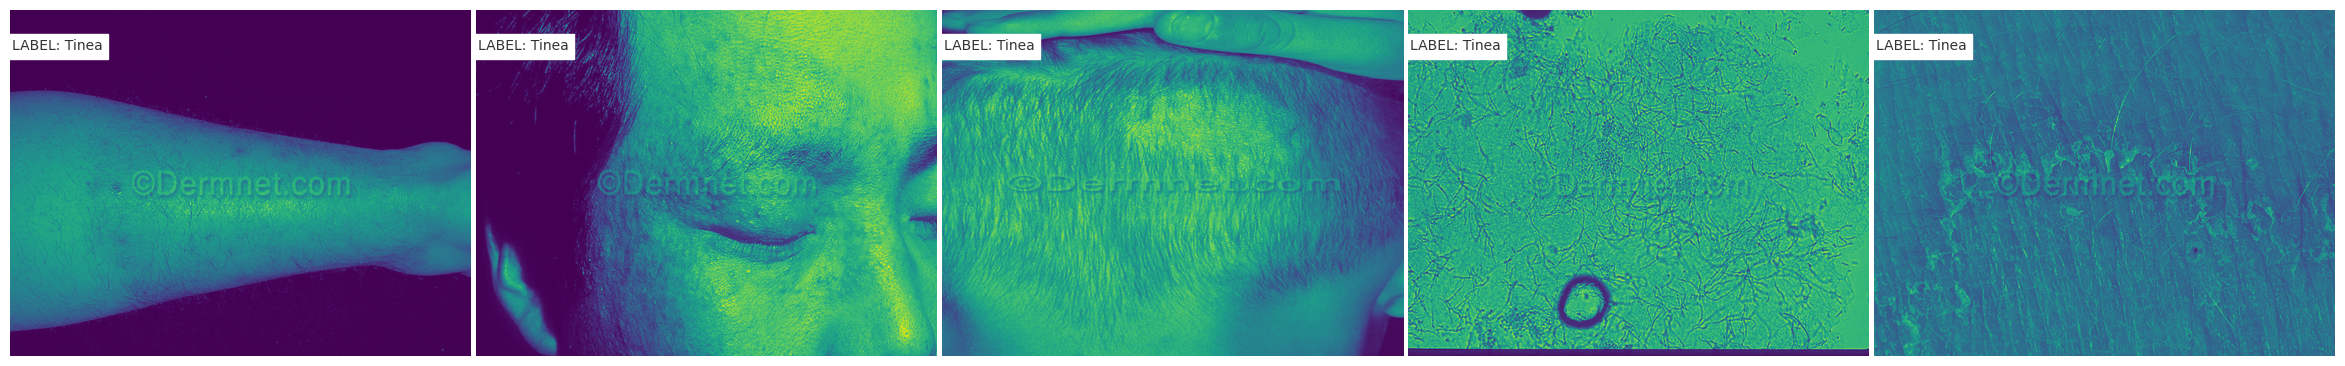

In [11]:
plotGridImages('Tinea',Tinea_train_files, Tinea_train_path,ncols=5)

Psoriasis


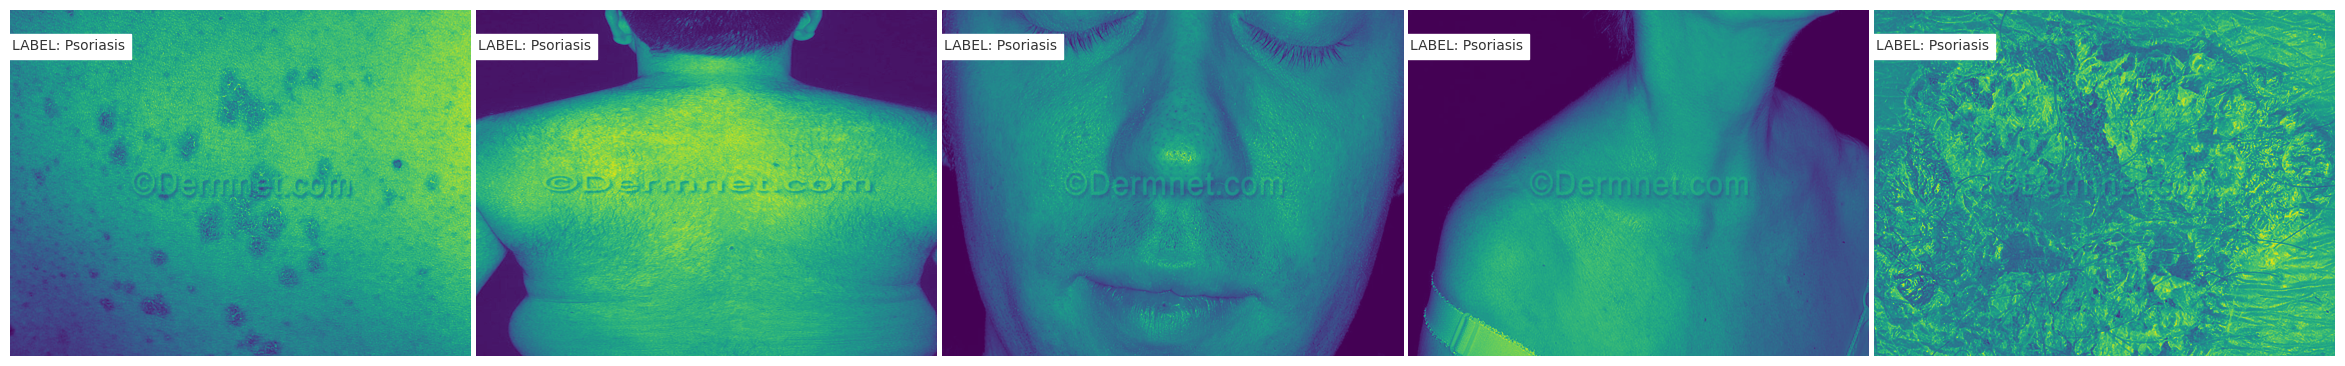

In [12]:
plotGridImages('Psoriasis',Psoriasis_train_files, Psoriasis_train_path,ncols=5)

Eczema


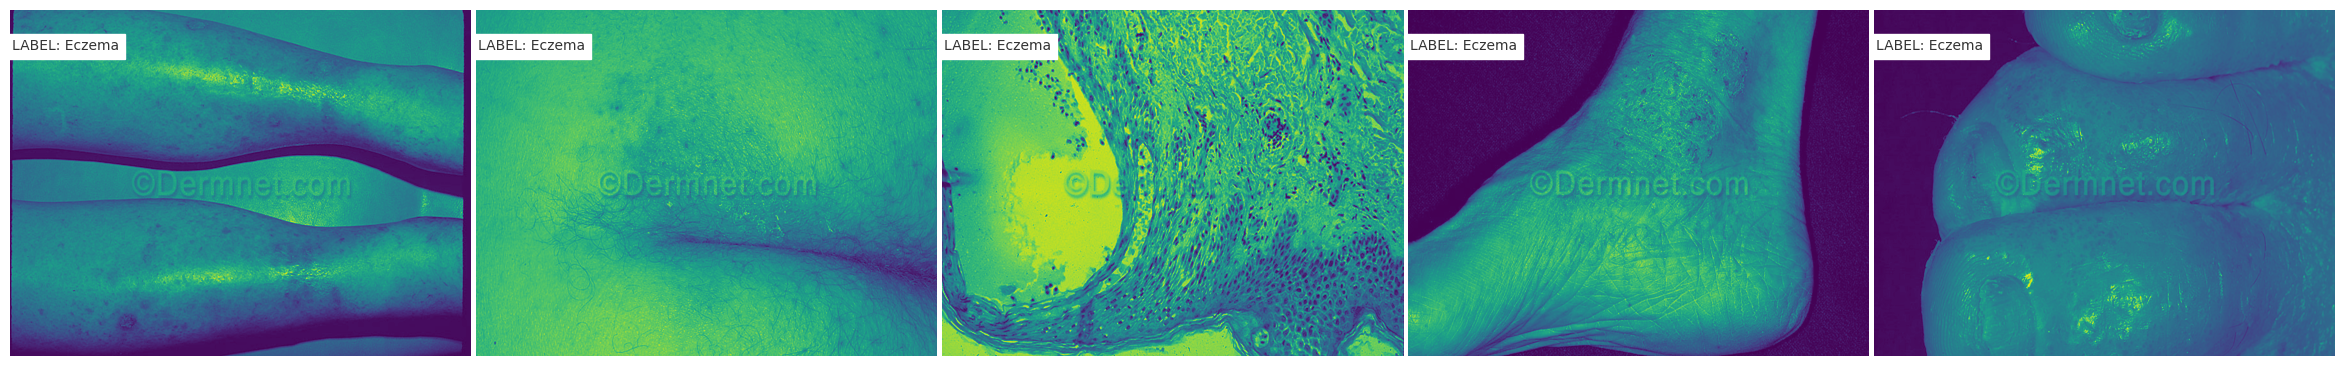

In [13]:
plotGridImages('Eczema',Eczema_train_files, Eczema_train_path,ncols=5)

Atopic


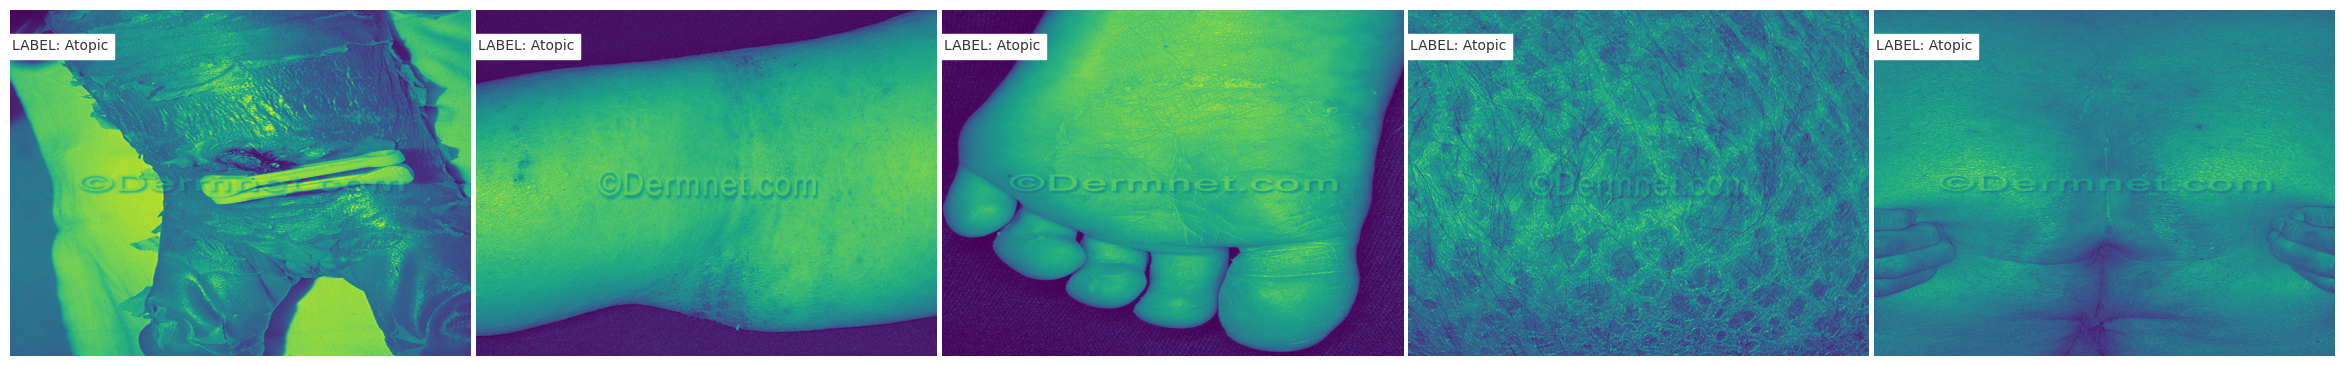

In [14]:
plotGridImages('Atopic',Atopic_train_files, Atopic_train_path,ncols=5)

In [15]:
final_df = pd.DataFrame()

In [16]:
Tinea_df = pd.DataFrame()
Tinea_df['Image'] = [Tinea_train_path+'/'+img for img in Tinea_train_files]
Tinea_df['Label'] = "Tinea"

In [17]:
Tinea_df.shape

(1299, 2)

In [18]:
Psoriasis_df = pd.DataFrame()
Psoriasis_df['Image'] =  [Psoriasis_train_path+'/'+img for img in Psoriasis_train_files]
Psoriasis_df['Label'] = "Psoriasis"

In [19]:
Psoriasis_df.shape

(1405, 2)

In [20]:
Eczema_df = pd.DataFrame()
Eczema_df['Image'] =  [Eczema_train_path+'/'+img for img in Eczema_train_files]
Eczema_df['Label'] = "Eczema"
Eczema_df.shape

(1235, 2)

In [21]:
Atopic_df = pd.DataFrame()
Atopic_df['Image'] =  [Atopic_train_path+'/'+img for img in Atopic_train_files]
Atopic_df['Label'] = "Atopic"
Atopic_df.shape

(489, 2)

In [22]:
final_df = final_df.append([Atopic_df, Eczema_df, Psoriasis_df, Tinea_df])

C:\Users\10224023\AppData\Local\Temp\ipykernel_16344\619702713.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append([Atopic_df, Eczema_df, Psoriasis_df, Tinea_df])


In [23]:
final_df.shape

(4428, 2)

In [24]:
final_df.sample(10)

Image      Label
1176  D:\dermotology_research\dataset\train\Psoriasi...  Psoriasis
654   D:\dermotology_research\dataset\train\Tinea Ri...      Tinea
131   D:\dermotology_research\dataset\train\Eczema/e...     Eczema
656   D:\dermotology_research\dataset\train\Psoriasi...  Psoriasis
659   D:\dermotology_research\dataset\train\Tinea Ri...      Tinea
403   D:\dermotology_research\dataset\train\Tinea Ri...      Tinea
1327  D:\dermotology_research\dataset\train\Psoriasi...  Psoriasis
78    D:\dermotology_research\dataset\train\Atopic D...     Atopic
259   D:\dermotology_research\dataset\train\Psoriasi...  Psoriasis
200   D:\dermotology_research\dataset\train\Psoriasi...  Psoriasis

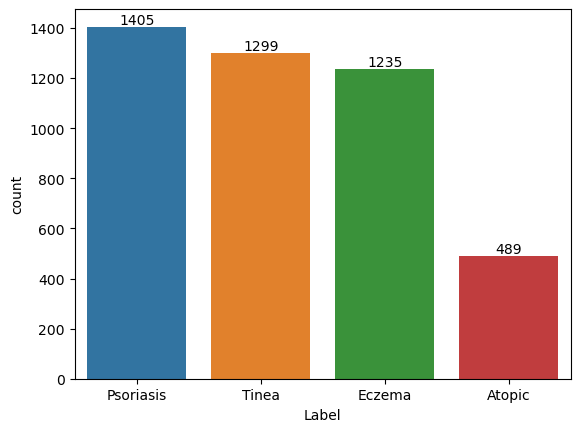

In [25]:
ax = sns.countplot(x=final_df['Label'],
                   order=final_df['Label'].value_counts(ascending=False).index);

abs_values = final_df['Label'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values);

In [26]:
final_test_df = pd.DataFrame()


Eczema_test_df = pd.DataFrame()
Eczema_test_df['Image'] = [Eczema_test_path+'/'+img for img in Eczema_test_files]
Eczema_test_df['Label'] = "Eczema"



Tinea_test_df = pd.DataFrame()
Tinea_test_df['Image'] =  [Tinea_test_path+'/'+img for img in Tinea_test_files]
Tinea_test_df['Label'] = "Tinea "



Psoriasis_test_df = pd.DataFrame()
Psoriasis_test_df['Image'] =  [Psoriasis_test_path+'/'+img for img in Psoriasis_test_files]
Psoriasis_test_df['Label'] = "Psoriasis"


Atopic_test_df = pd.DataFrame()
Atopic_test_df['Image'] =  [Atopic_test_path+'/'+img for img in Atopic_test_files]
Atopic_test_df['Label'] = "Atopic"


final_test_df = final_test_df.append([Tinea_test_df, 
                                      Psoriasis_test_df, 
                                      Atopic_test_df,
                                      Eczema_test_df])

final_test_df.shape

C:\Users\10224023\AppData\Local\Temp\ipykernel_16344\657469699.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_test_df = final_test_df.append([Tinea_test_df,


(1109, 2)

In [27]:
train_data_gen  = ImageDataGenerator(
                                    rescale=1 / 255.0,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip = True,
                                    vertical_flip = True,
                                    validation_split=0.2,
                                    fill_mode='nearest')
test_data_gen = ImageDataGenerator(rescale=1 / 255.0)



In [28]:
batch_size = 8
train_generator = train_data_gen.flow_from_dataframe(
    dataframe=final_df,
    x_col="Image",
    y_col="Label",
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode="categorical",
    subset='training',
    shuffle=True,
    seed=42
)
valid_generator = train_data_gen.flow_from_dataframe(
    dataframe=final_df,
    x_col="Image",
    y_col="Label",
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode="categorical", 
    subset='validation',
    shuffle=True,
    seed=42 
)
test_generator = test_data_gen.flow_from_dataframe(
    dataframe=final_test_df,
    x_col="Image",
    y_col="Label",
    target_size=(256, 256),
    batch_size=1,
    class_mode='categorical',
    shuffle=False,
    seed=42
)

Found 3543 validated image filenames belonging to 4 classes.
Found 885 validated image filenames belonging to 4 classes.
Found 1109 validated image filenames belonging to 4 classes.


In [29]:
res = VGG16(weights ='imagenet', include_top = False, 
               input_shape = (256, 256, 3)) 
               
res.trainable = False


x= res.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
 
x = Dense(512, activation ='relu')(x)
x = BatchNormalization()(x)


x = Dense(256, activation ='relu')(x)
x = BatchNormalization()(x)

x = Dense(4, activation ='softmax')(x)
model = Model(res.input, x)

model.compile(optimizer =tf.keras.optimizers.RMSprop(learning_rate=0.0001),  
              loss ="categorical_crossentropy",  
              metrics =["categorical_accuracy"])  

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

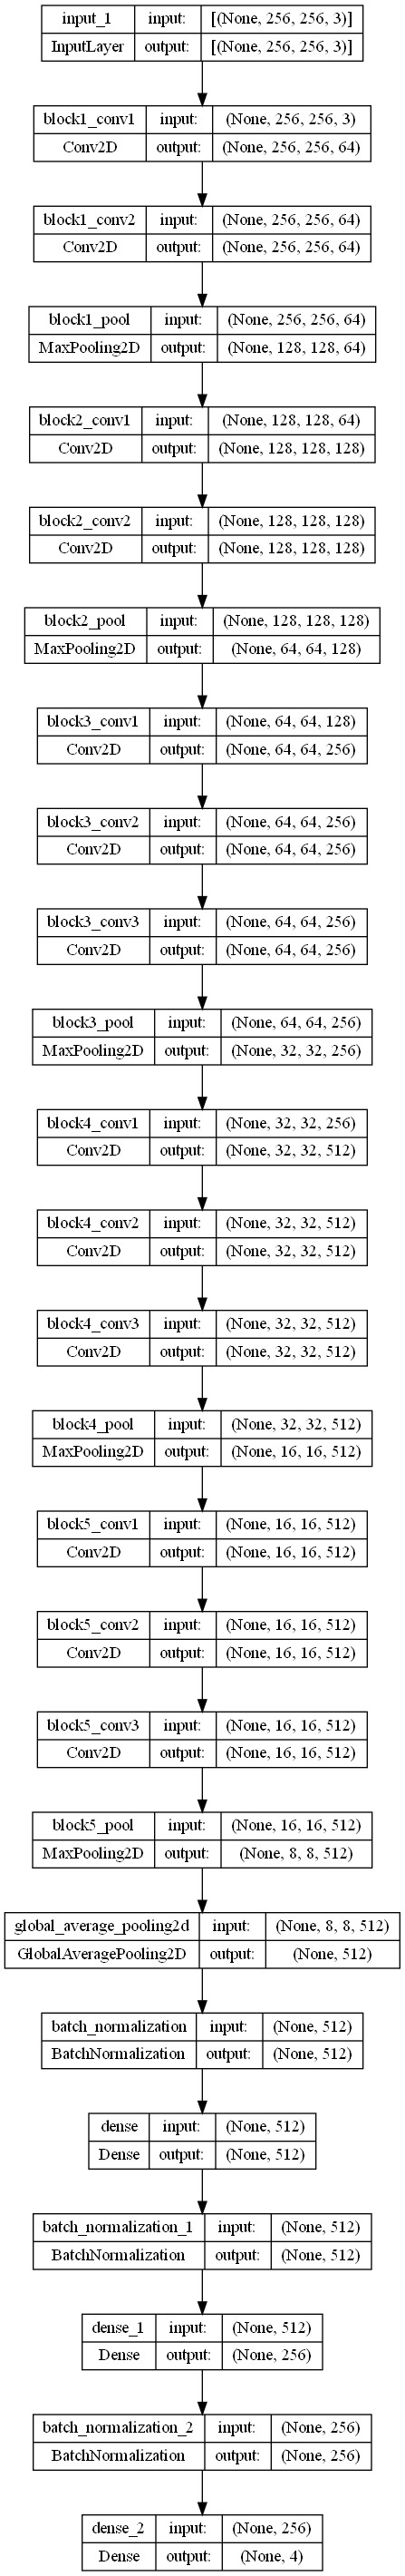

In [30]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [31]:
custom_early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    min_delta=0.001, 
    mode='min')

In [32]:
history = model.fit(train_generator, 
                    epochs=10, 
                    validation_data=valid_generator,
                   callbacks=[custom_early_stopping])

Epoch 1/10
443/443 [==============================] - 445s 1s/step - loss: 1.5123 - categorical_accuracy: 0.3587 - val_loss: 2.0697 - val_categorical_accuracy: 0.1006
Epoch 2/10
443/443 [==============================] - 426s 961ms/step - loss: 1.2681 - categorical_accuracy: 0.4527 - val_loss: 2.4199 - val_categorical_accuracy: 0.1525
Epoch 3/10
443/443 [==============================] - 424s 957ms/step - loss: 1.1568 - categorical_accuracy: 0.4756 - val_loss: 2.6408 - val_categorical_accuracy: 0.1514
Epoch 4/10
443/443 [==============================] - 423s 956ms/step - loss: 1.0919 - categorical_accuracy: 0.4911 - val_loss: 2.8857 - val_categorical_accuracy: 0.1141
Epoch 5/10
443/443 [==============================] - 423s 956ms/step - loss: 1.0481 - categorical_accuracy: 0.5018 - val_loss: 3.1289 - val_categorical_accuracy: 0.1243
Epoch 6/10
443/443 [==============================] - 565s 1s/step - loss: 1.0264 - categorical_accuracy: 0.5191 - val_loss: 3.3384 - val_categorical_acc